# Predicting used car prices

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Import dataset

In [2]:
data = pd.read_csv(r"C:\Users\manit\OneDrive\Documents\GitHub\used-vehicle-price-prediction-data-secience\dataset.csv")
data.sample(8)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5390,5390,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,NaN,4.95
2147,2147,Maruti Ciaz AT ZXi,Mumbai,2014,46738,Petrol,Automatic,First,19.12 kmpl,1373 CC,91.1 bhp,5.0,NaN,6.10
4358,4358,Toyota Etios G,Kolkata,2011,45560,Petrol,Manual,First,17.6 kmpl,1496 CC,88.73 bhp,5.0,NaN,2.20
4507,4507,BMW 3 Series 320i,Pune,2009,40000,Petrol,Automatic,Second,12.05 kmpl,1995 CC,154 bhp,5.0,NaN,9.50
2206,2206,Hyundai i20 1.2 Era,Kolkata,2015,35000,Petrol,Manual,First,17.0 kmpl,1197 CC,80 bhp,5.0,NaN,3.40
3747,3747,Maruti Vitara Brezza ZDi,Delhi,2016,35299,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,10.14 Lakh,8.00
1022,1022,Honda City 1.5 V MT,Pune,2009,138000,Petrol,Manual,Second,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,3.50
3455,3455,Maruti Wagon R LXI CNG,Mumbai,2014,41000,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,3.50


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


## Data Cleaning 
* missingno is a quick and easy way used to visualize missing values in the datasets
* using dropna to remove the null valued records from the datasets

<Axes: >

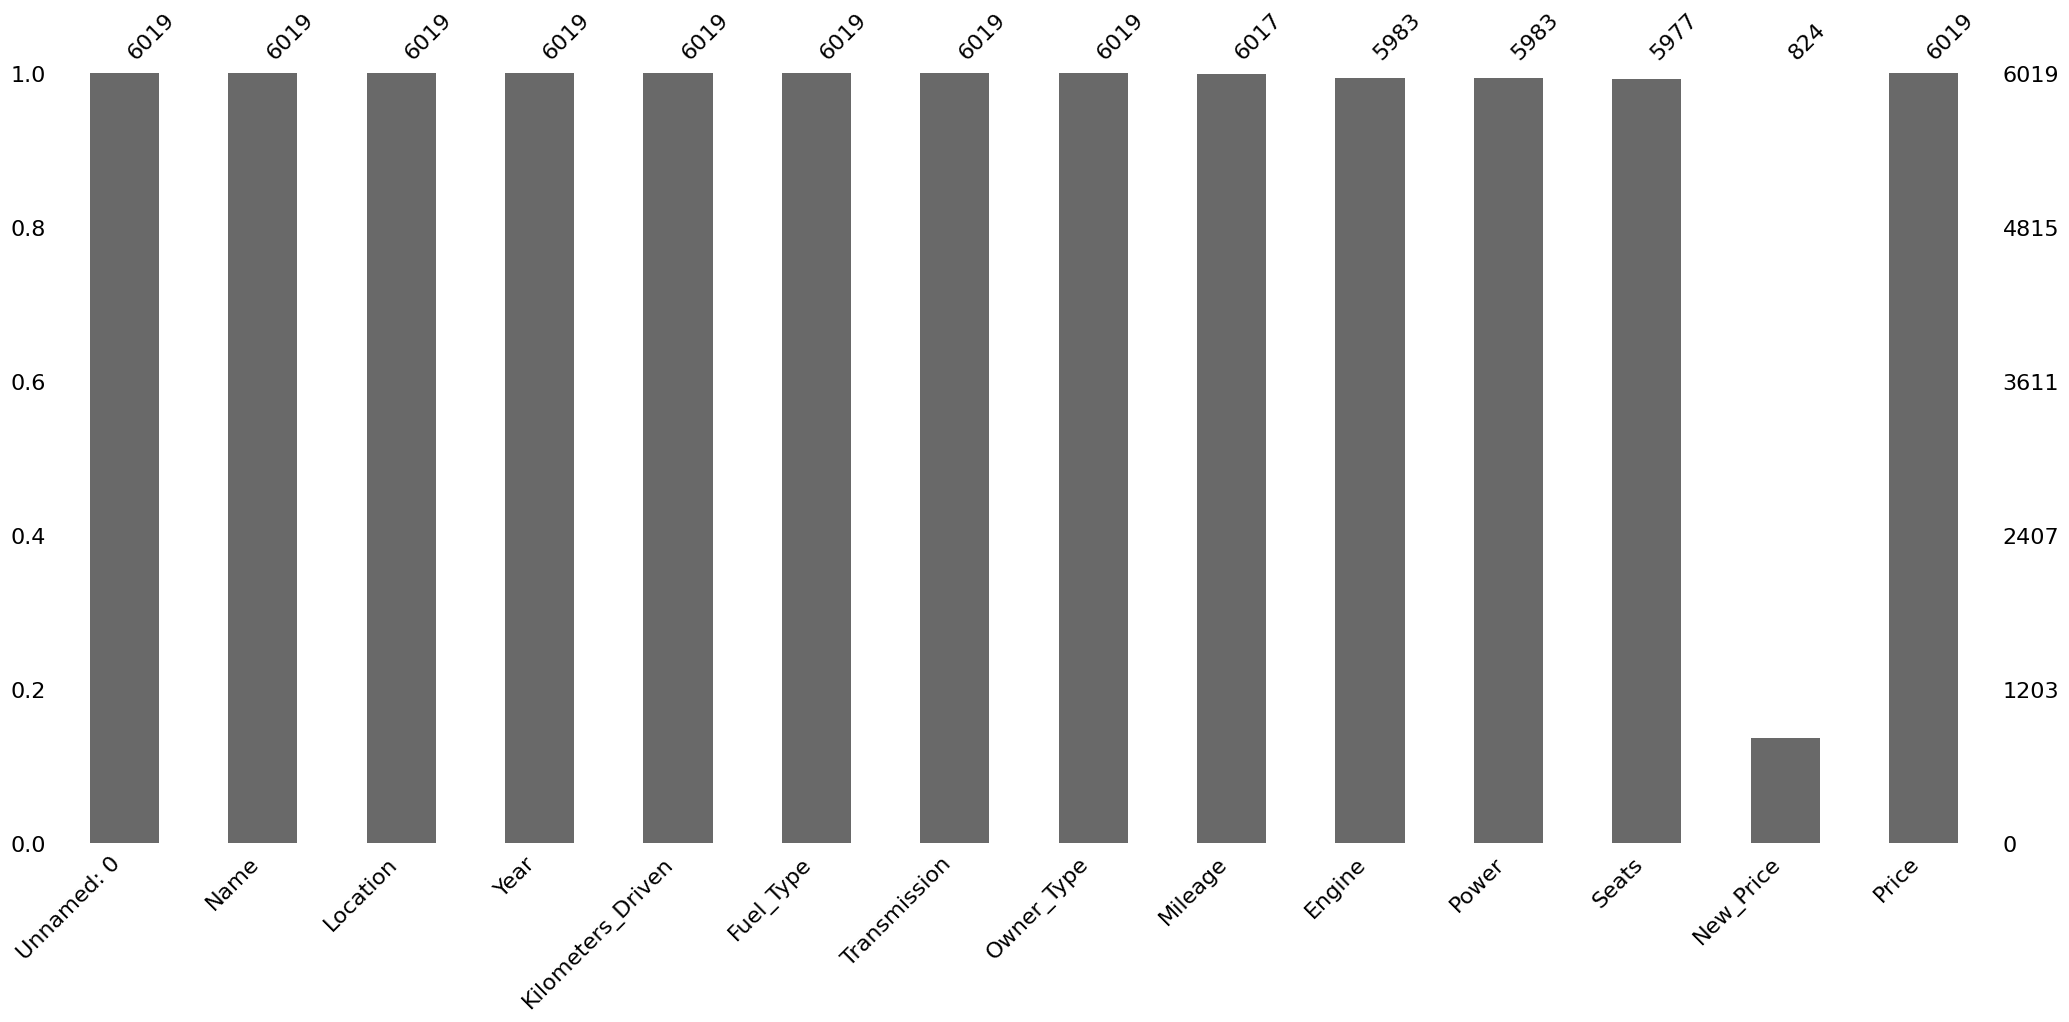

In [4]:
import missingno as msno
msno.bar(data)

In [5]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
data.shape

(6019, 14)

In [7]:
data = data.dropna(how='any',axis=0)
data.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

## Test Train Split
* 70% as train data and 30% as test data
* training data is used to train the machine learning models and test data is used to check the accuracy of the model

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], 
                                                    data.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)
# iloc[:, :-1] selects the column except the last 
# iloc[:, -1] selects the last column

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 1773 to 732
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         576 non-null    int64  
 1   Name               576 non-null    object 
 2   Location           576 non-null    object 
 3   Year               576 non-null    int64  
 4   Kilometers_Driven  576 non-null    int64  
 5   Fuel_Type          576 non-null    object 
 6   Transmission       576 non-null    object 
 7   Owner_Type         576 non-null    object 
 8   Mileage            576 non-null    object 
 9   Engine             576 non-null    object 
 10  Power              576 non-null    object 
 11  Seats              576 non-null    float64
 12  New_Price          576 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 63.0+ KB


In [10]:
# y_train holds the training data to which the test model needs to be trained for better accuracy
y_train

1773     9.29
1652    38.00
3244    17.50
2371     3.90
962     39.50
        ...  
456      8.92
750     10.65
2008    16.50
3127     9.51
732      5.70
Name: Price, Length: 576, dtype: float64

## Exploratory Data Analysis
* Let's explore the various columns and draw information about how useful each columns are

### Index

In [11]:
# The first column is the index for each data point and hence we can simply remove it.
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [12]:
# the index numbers aren't considered for the prediction
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 1773 to 732
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               576 non-null    object 
 1   Location           576 non-null    object 
 2   Year               576 non-null    int64  
 3   Kilometers_Driven  576 non-null    int64  
 4   Fuel_Type          576 non-null    object 
 5   Transmission       576 non-null    object 
 6   Owner_Type         576 non-null    object 
 7   Mileage            576 non-null    object 
 8   Engine             576 non-null    object 
 9   Power              576 non-null    object 
 10  Seats              576 non-null    float64
 11  New_Price          576 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 58.5+ KB


### Name
**Let's explore the various cars in the dataset**

In [13]:
X_train["Name"].value_counts()

BMW 3 Series 320d                            11
Hyundai Grand i10 1.2 Kappa Sportz           10
Maruti Alto K10 VXI                          10
BMW 5 Series 520d Luxury Line                 8
Maruti Vitara Brezza ZDi Plus Dual Tone       8
                                             ..
Hyundai Creta 1.4 E Plus Diesel               1
Tata Nexon 1.5 Revotorq XZ Plus Dual Tone     1
Isuzu MUX 4WD                                 1
Volkswagen Polo 1.0 MPI Comfortline           1
Maruti S-Cross Delta DDiS 200 SH              1
Name: Name, Length: 264, dtype: int64

* we can say that there are several cars in the dataset, some of them with a count > 1
* the resale value of the car may also depend upon the manufacturers. So let's extract the manufacturer from this column and add it to the dataset.

#### from the test-train data we extract the manufactures' data

In [14]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)
make_train[0]

1773            Honda
1652           Jaguar
3244             Jeep
2371           Maruti
962     Mercedes-Benz
            ...      
456            Maruti
750             Honda
2008           Toyota
3127           Maruti
732             Honda
Name: 0, Length: 576, dtype: object

In [15]:
# make_train[0] will have list of car names, using this data we create a new column manufacturers
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]
X_train.sample(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Manufacturer
3480,Hyundai Grand i10 1.2 Kappa Sportz,Coimbatore,2014,33496,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,7.45 Lakh,Hyundai
44,Hyundai Elantra 2.0 SX Option AT,Bangalore,2014,46374,Petrol,Automatic,First,14.62 kmpl,1999 CC,149.92 bhp,5.0,23.64 Lakh,Hyundai
4327,BMW X1 xDrive 20d M Sport,Kolkata,2017,27001,Diesel,Automatic,First,20.68 kmpl,1995 CC,190 bhp,5.0,50.26 Lakh,BMW
3567,Mercedes-Benz CLA 200 CDI Sport,Kochi,2019,13414,Diesel,Automatic,First,17.9 kmpl,2143 CC,136 bhp,5.0,43.07 Lakh,Mercedes-Benz


**Let's also confirm that there are no null values and identify all unique values**

Text(0, 0.5, 'Count of cars')

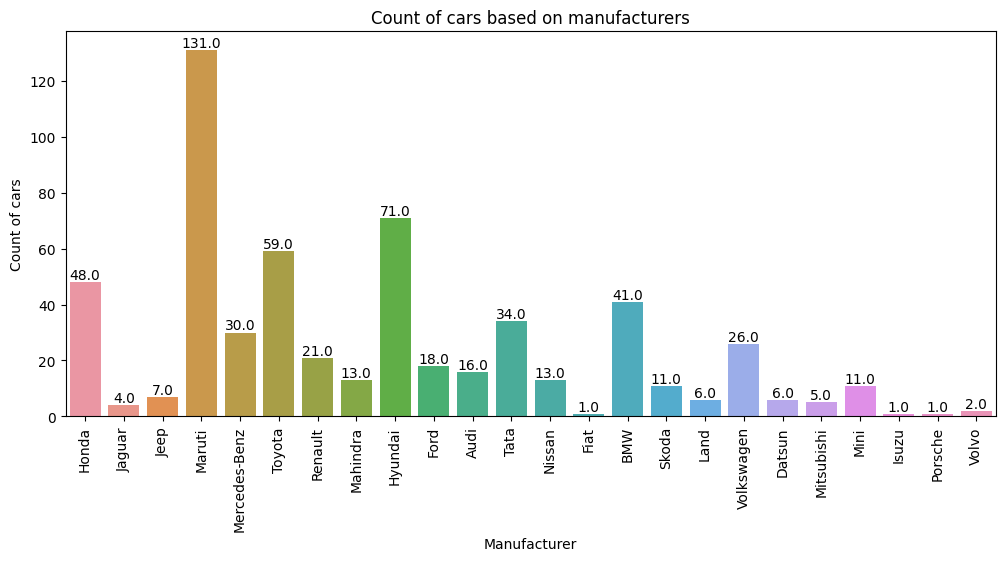

In [16]:
plt.figure(figsize = (12, 5))
plot = sns.countplot(x = 'Manufacturer', data = X_train)

for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

# labels
plt.xticks(rotation = 90) 
plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

* from the above plot we can infer that Maximum cars in the dataset are by the manufactured **Maruti**
* Let's drop the `Name` column, as it's not required further in our prediction

In [17]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

X_train.sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Manufacturer
5451,Kolkata,2016,26000,Diesel,Manual,First,25.4 kmpl,1186 CC,73.97 bhp,5.0,8.23 Lakh,Hyundai
4612,Kochi,2015,81828,Diesel,Manual,First,24.0 kmpl,1186 CC,73.97 bhp,5.0,8.68 Lakh,Hyundai
654,Bangalore,2011,64357,Petrol,Manual,First,24.07 kmpl,998 CC,67.1 bhp,5.0,4.7 Lakh,Maruti
2533,Coimbatore,2017,20969,Diesel,Automatic,First,17.9 kmpl,2143 CC,136 bhp,5.0,45.36 Lakh,Mercedes-Benz
4926,Coimbatore,2018,44383,Petrol,Manual,First,15.8 kmpl,1591 CC,121.3 bhp,5.0,17.7 Lakh,Hyundai


### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [18]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [19]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

# as the price may vary with respect to the age of the car, so we calculate how much old the car is

X_train.sample(5)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Manufacturer
5427,7,30000,Petrol,Automatic,First,22.5 kmpl,998 CC,67 bhp,5.0,5.68 Lakh,Maruti
742,9,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0,5.57 Lakh,Maruti
2459,6,30000,Diesel,Manual,First,23.0 kmpl,1498 CC,98.96 bhp,5.0,11.89 Lakh,Ford
3239,10,56454,Diesel,Manual,First,28.4 kmpl,1248 CC,73.75 bhp,5.0,8.95 Lakh,Maruti
5135,7,14980,Diesel,Manual,First,27.3 kmpl,1498 CC,98.6 bhp,5.0,10.81 Lakh,Honda


## Mileage

We need to extract the numerical value out of each string and save it in the column, as the units of the data aren't required fot our analysis

In [20]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')
mileage_train[0] # consists of the value of mileage of the cars

1773     17.5
1652     13.6
3244     16.3
2371    33.54
962       0.0
        ...  
456      25.1
750      18.0
2008    13.68
3127     24.3
732      17.4
Name: 0, Length: 576, dtype: object

Let's check for missing values.

In [21]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
0


There is no missing value in each

### Engine, Power and Seats
* Removing the units of the recorded data, as they aren't needed for our prediction
* The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `Power` has bhp, so remove `bhp` from it.

In [22]:
X_train.sample(3)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Manufacturer
1187,8,40600,Petrol,Automatic,First,17.0,1591 CC,121.3 bhp,5.0,15.14 Lakh,Hyundai
3373,6,7500,Petrol,Manual,First,17.4,1497 CC,117.3 bhp,5.0,13.76 Lakh,Honda
604,7,25000,Diesel,Automatic,First,21.5,1498 CC,108.5 bhp,5.0,15.86 Lakh,Volkswagen


In [23]:
# value of engine volume value is extracted, as we dont want the units
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)

# now we convert the dataframe into series, and updating the engine column
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

# similarly we do it for power column
bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)

X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

X_train.head(1)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Manufacturer
1773,5,15135,Petrol,Manual,First,17.5,1199,88.7,5.0,10.57 Lakh,Honda


In [24]:
# filling the null valued data with the mean of other data in the same column
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

In [25]:
X_train.sample(3)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Manufacturer
1368,4,18453,Petrol,Manual,First,18.90,1197,81.86,5.0,6.68 Lakh,Hyundai
1226,6,21000,Petrol,Automatic,First,14.28,1798,138.03,5.0,23.25 Lakh,Toyota
1243,7,85000,Diesel,Manual,First,14.95,2489,93.70,7.0,11.67 Lakh,Mahindra


### New Price

As most of the values are missing, I'll drop this column altogether.

In [26]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

### Kilometers_Driven

`Kilometers_Driven` is a numerical column with a certain range of values.

In [27]:
X_train["Kilometers_Driven"]

1773    15135
1652     4000
3244    15050
2371    29202
962      8682
        ...  
456     12923
750     18955
2008    67000
3127    35981
732     55818
Name: Kilometers_Driven, Length: 576, dtype: int64

* As the data range is really varied and the high values might affect prediction.
* thus, it is really important that scaling be applied to this column to make sure the data is balanced

### Visualising the column relationship

<Axes: xlabel='Kilometers_Driven', ylabel='Mileage'>

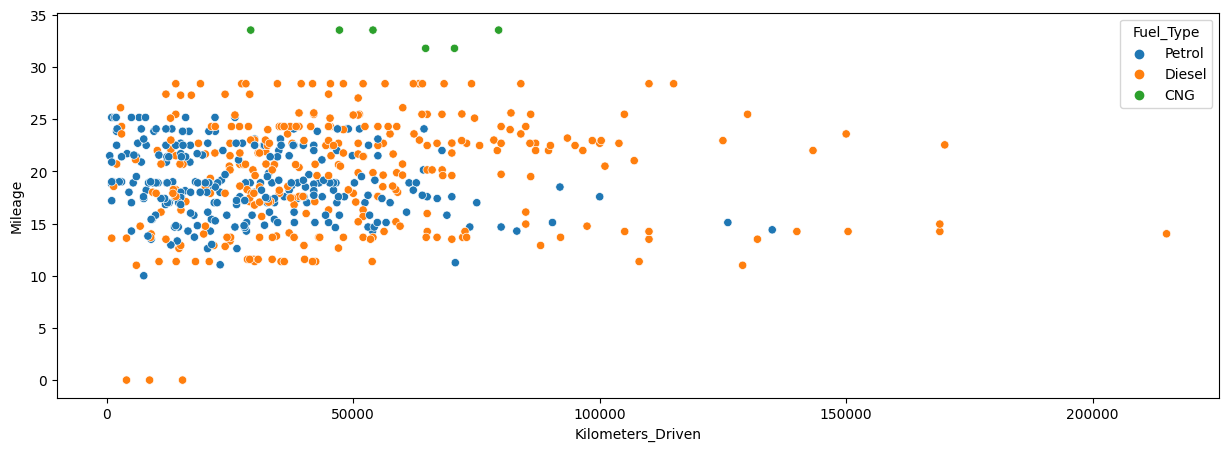

In [28]:
plt.figure(figsize=(15,5))
sns.scatterplot(X_train, y='Mileage', x='Kilometers_Driven', hue='Fuel_Type')

## Data Processing

* Now that we have worked with the training data, let's create dummy columns for categorical columns using one-hot encoding before we begin training.
* **One hot encoding** is a technique that we use to represent **categorical variables as numerical values** in a machine learning model.

In [29]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)
X_train.sample(5)

#the manufacturer column is categorized 

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_BMW,Manufacturer_Datsun,Manufacturer_Fiat,Manufacturer_Ford,...,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third
3836,5,22000,15.26,1798,187.74,5.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3911,7,14500,14.67,1798,177.46,5.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1784,7,43041,18.90,1197,81.86,5.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1773,5,15135,17.50,1199,88.70,5.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5178,8,64687,31.79,998,58.33,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


similarly we create the dummy columns for X_test data also

In [30]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)
X_test.sample(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Manufacturer_BMW,Manufacturer_Datsun,Manufacturer_Ford,Manufacturer_Honda,...,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third
4516,7,55000,15.10,1196,73.00,7.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
10,5,25692,21.56,1462,103.25,5.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
573,11,105000,15.96,2523,62.10,7.0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1783,6,37832,22.50,998,67.00,5.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
201,7,20000,24.30,1248,88.50,5.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [31]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]


`Standardizing the data`
* StandardScaler is a preprocessing technique used in machine learning to standardize the features of a dataset, to ensure the data are in same scale for modeling
* its done by removing the mean and scales each variable to unit variance

In [32]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

## Training and predicting

* so now we will create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions
* and compare the score of the two models

0.8318091414739616


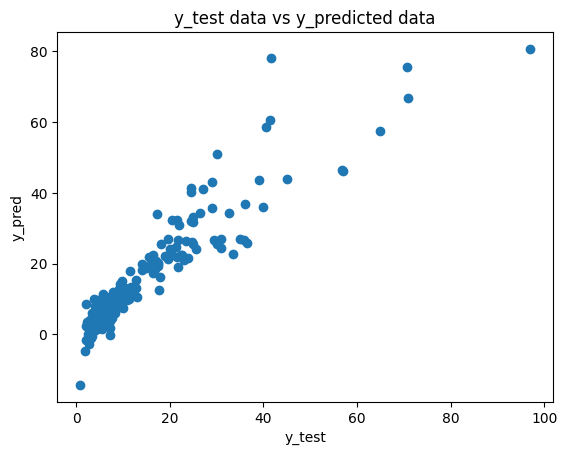

In [33]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
# r2_score is a measurement done to check the goodness and fit of the model
# like how well the regression data approximates the actual data
print(r2_score(y_test, y_pred))


# we plot the data to visualize 
plt.title("y_test data vs y_predicted data")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(y_test, y_pred)

The `Linear regression` model performed the best with a R2 score of approx **0.831**

0.8616963550409823


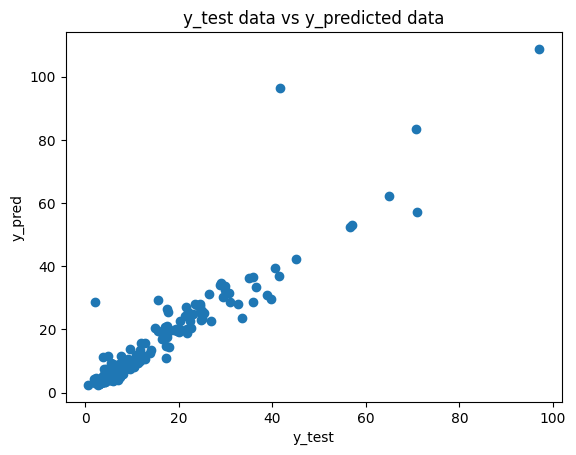

In [34]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(r2_score(y_test, y_pred))


plt.title("y_test data vs y_predicted data")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(y_test, y_pred)

The `Random Forest` model performed the best with a R2 score of approx **0.861**.